In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import torch
import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [38]:
# CSV 파일에 접근
arbiter_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop_test.csv')

# test 정보만 가지고 온다
arbiter_info= arbiter_info[arbiter_info['phase']=='val']

# mini-imagenet
arbiter_info_mini_imagenet = arbiter_info[arbiter_info['current_iter']=='mini_imagenet_full_size']
arbiter_info_mini_imagenet = arbiter_info_mini_imagenet.groupby('num_step')

# CIFAR_FS
arbiter_info_CIFAR_FS = arbiter_info[arbiter_info['current_iter']=='CIFAR_FS']
arbiter_info_CIFAR_FS = arbiter_info_CIFAR_FS.groupby('num_step')

# CUB
arbiter_info_CUB = arbiter_info[arbiter_info['current_iter']=='CUB']
arbiter_info_CUB = arbiter_info_CUB.groupby('num_step')

Max value: 3.7340977764669647


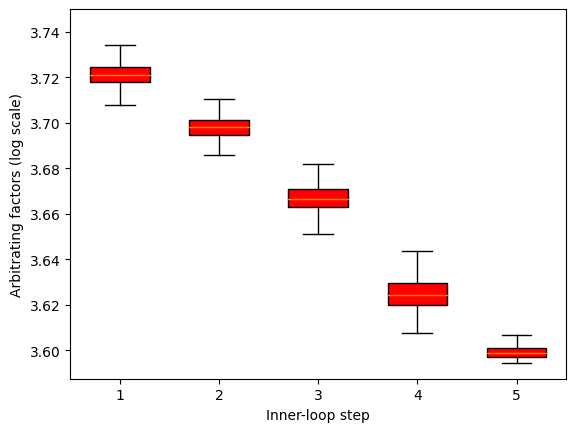

In [43]:
x = [1, 2, 3, 4, 5]
filtered_values_2 = []
        
for name, group in arbiter_info_mini_imagenet:
    group_values = group['all_grads_l2norm']
    group_values = np.log(group_values)
    filtered_values_2.append(group_values)

    
max_value = max(max(group) for group in filtered_values_2)
print("Max value:", max_value)


# 두 번째 박스플롯
plt.boxplot(filtered_values_2, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='red'), showfliers=False)

# x축 라벨 설정
plt.xticks(x)

# 그래프 라벨 및 제목 설정
plt.xlabel('Inner-loop step')
plt.ylabel('Arbitrating factors (log scale)')
# plt.title('Arbitrating factors')

plt.ylim(None, 3.75) 

# # 그래프를 표시합니다
# plt.show()

# 그래프를 저장합니다
plt.savefig('Arbitrating_factor_miniImageNet' + '.png')

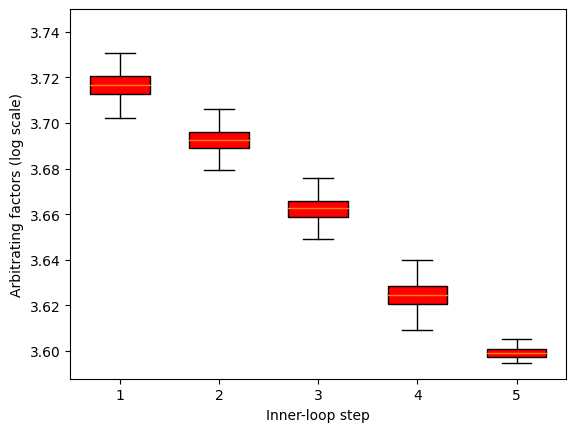

In [44]:
x = [1, 2, 3, 4, 5]
filtered_values_2 = []
        
for name, group in arbiter_info_CUB:
    group_values = group['all_grads_l2norm']
    group_values = np.log(group_values)
    filtered_values_2.append(group_values)

    
# positions_2 = [i * 2.0 + 0.8 for i in range(len(filtered_values_2))]


# 두 번째 박스플롯
plt.boxplot(filtered_values_2, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='red'), showfliers=False)

# x축 라벨 설정
plt.xticks(x)


# 그래프 라벨 및 제목 설정
plt.xlabel('Inner-loop step')
plt.ylabel('Arbitrating factors (log scale)')
# plt.title('Arbitrating factors')

plt.ylim(None, 3.75) 

# # 그래프를 표시합니다
# plt.show()

# 그래프를 저장합니다
plt.savefig('Arbitrating_factor_CUB' + '.png')

Max value: 3.737561892696484


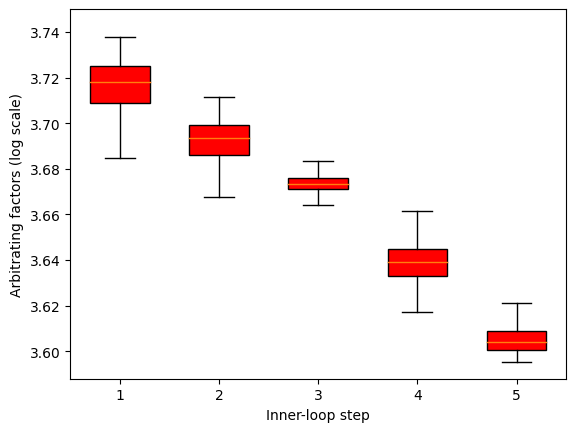

In [45]:
x = [1, 2, 3, 4, 5]
filtered_values_2 = []
        
for name, group in arbiter_info_CIFAR_FS:
    group_values = group['all_grads_l2norm']
    group_values = np.log(group_values)
    filtered_values_2.append(group_values)

    
max_value = max(max(group) for group in filtered_values_2)
print("Max value:", max_value)


# 두 번째 박스플롯
plt.boxplot(filtered_values_2, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='red'), showfliers=False)

# x축 라벨 설정
plt.xticks(x)

# 그래프 라벨 및 제목 설정
plt.xlabel('Inner-loop step')
plt.ylabel('Arbitrating factors (log scale)')
# plt.title('Arbitrating factors')

plt.ylim(None, 3.75) 

# # 그래프를 표시합니다
# plt.show()

# 그래프를 저장합니다
plt.savefig('Arbitrating_factor_CIFAR_FS' + '.png')